# Airline Analysis

The goal of this project is to guide airline company clients' decisions by providing summary statistics that focus on one, two or several variables and visualise its results. 

Columns description:

- `miles`: miles traveled through the flight;
- `passengers`: number of passengers on the flight;
- `delay`: take-off delay in minutes;
- `inflight_meal`: meal is included or not;
- `inflight_entertainment`: free entertainment systems for each seat is included or not;
- `inflight_wifi`: complimentary wifi on the flight is included or not;
- `day_of_week`: day of the week of the flight;
- `weekend`: does this flight take place on a weekend or not;
- `coach_price`: the average price paid for a coach ticket ($);
- `firstclass_price`: the average price paid for first-class seats ($);
- `hours`: how many hours the flight took;
- `redeye`: is it an overnight flight or not.

## Data Investigation and Cleaning

Firstly, we'll import necessary libraries and upload a dataset to a `flights` variable. 


In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Upload csv to DataFrame
flights = pd.read_csv("flight.csv")
flights

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,No,Yes,Yes,Friday,No,Yes,383.240,1478.70,1
129776,2125,208,1479,No,Yes,Yes,Friday,No,Yes,397.825,1616.01,4
129777,1702,220,1501,No,Yes,Yes,Friday,No,Yes,380.980,1481.49,3
129778,2709,205,1484,No,Yes,Yes,Saturday,No,Yes,485.185,1589.70,5


Now let's check `flights` data types. Judging by several columns with binary categorical variables there is a chance that we'll need them and some other data to be of other type than they are now. 

In [42]:
flights.dtypes

miles                       int64
passengers                  int64
delay                       int64
inflight_meal              object
inflight_entertainment     object
inflight_wifi              object
day_of_week                object
redeye                     object
weekend                    object
coach_price               float64
firstclass_price          float64
hours                       int64
dtype: object

Most of the columns are of a type `object`. We'll need to change it to numerical types and one column to the type `category`. 
We are going to start with  `category` type. It needs to be applied to the `day_of_week` feature.

In [43]:
# Get a full list of unique items in column
flights.day_of_week.unique()

array(['Sunday', 'Friday', 'Saturday', 'Monday', 'Wednesday', 'Tuesday',
       'Thursday'], dtype=object)

In [44]:
# Change column type to 'category'
flights['day_of_week'] = pd.Categorical(
    flights['day_of_week'], 
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday'], 
    ordered=True)

Now we are going to convert binary categorical variables to integers.


In [45]:
def convert_to_binary(dataset, list_of_columns):
    for i in list_of_columns:
        dataset[i] = pd.Categorical(dataset[i], ['No', 'Yes'], ordered=True)
        dataset[i] = dataset[i].cat.codes
    return dataset

In [46]:
# Convert features
convert_to_binary(flights, ['inflight_meal', 'inflight_entertainment', 'inflight_wifi', 'redeye', 'weekend'])

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,0,1,1,Sunday,1,1,338.820,1571.02,1
1,3163,214,0,0,1,1,Sunday,0,1,472.655,1663.70,6
2,1832,212,0,0,1,0,Friday,0,1,351.960,1429.86,3
3,925,213,0,0,1,1,Saturday,0,1,387.835,1558.76,2
4,967,217,0,1,1,1,Monday,0,0,374.735,1245.58,2
...,...,...,...,...,...,...,...,...,...,...,...,...
129775,674,217,1487,0,1,1,Friday,0,1,383.240,1478.70,1
129776,2125,208,1479,0,1,1,Friday,0,1,397.825,1616.01,4
129777,1702,220,1501,0,1,1,Friday,0,1,380.980,1481.49,3
129778,2709,205,1484,0,1,1,Saturday,0,1,485.185,1589.70,5


Check what we have got in the end. 

In [47]:
flights.dtypes

miles                        int64
passengers                   int64
delay                        int64
inflight_meal                 int8
inflight_entertainment        int8
inflight_wifi                 int8
day_of_week               category
redeye                        int8
weekend                       int8
coach_price                float64
firstclass_price           float64
hours                        int64
dtype: object

Data types are corrected. Let's check out some general statistics over all features.

In [48]:
flights.describe()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,redeye,weekend,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,0.300254,0.801572,0.899723,0.049669,0.652204,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,0.458370,0.398818,0.300371,0.217260,0.476273,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,0.000000,1.000000,1.000000,0.000000,0.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,0.000000,1.000000,1.000000,0.000000,1.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,1.000000,1.000000,1.000000,0.000000,1.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,1.000000,1.000000,1.000000,1.000000,1.000000,593.635000,1846.780000,8.000000


Result: values also look fine, so we are: "Cocked, Locked and Ready to Rock!"

## Univariate Analysis

Now we'll answer on some questions: 
- What do coach ticket prices look like? 
- What are the high and low values? 
- What would be considered average? 
- Does $500 seem like a good price for a coach ticket?

To answer them we need to create some visualisations: histogram and boxplot would be valuable. Let's do both. 

In [49]:
# Set darkgrid for all plots of the project
sns.set(style='darkgrid')

def visualise_histplot(dataset, column_name, bars_color, xlabel, feature):    
    plt.figure(figsize=(15,10))
    ax = sns.histplot(dataset[column_name], stat='count', color=bars_color, legend=True, bins=30, linewidth=0.5)
    # Add Mean
    plt.axvline(x = dataset[column_name].mean(), color='Tomato')
    # Add Median
    plt.axvline(x = dataset[column_name].median(), color='MediumPurple')

    # Add descriptions
    ax.legend( 
    title_fontsize='large', 
    loc='best', 
    labels=['Mean', 'Median', xlabel], 
    fontsize = 'large')

    ax.set_title('Distribution of ' + feature, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel('Count', fontsize = 'large')
    return plt.show()

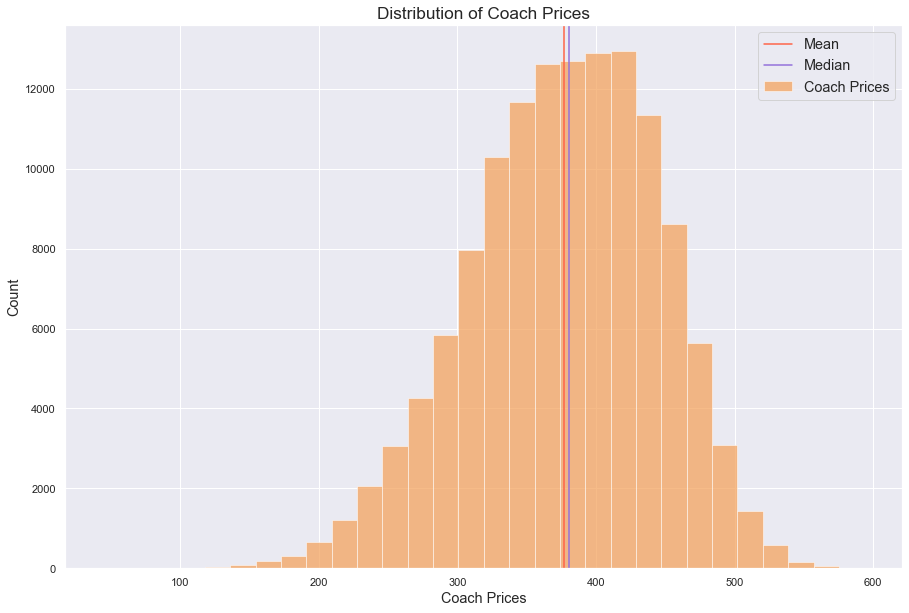

In [50]:
# Draw histplot of all flights
visualise_histplot(dataset=flights, column_name='coach_price', bars_color='SandyBrown', xlabel='Coach Prices', feature='Coach Prices')

In [87]:
def visualise_boxplot(dataset, column_name, color, xlabel, feature):
    plt.figure(figsize=(15,10))
    ax = sns.boxplot(x=dataset[column_name], 
    color=color,
    # Add mean as +
    showmeans=True,
    meanprops={"marker": "+",
        "markeredgecolor": "black",
        "markersize": "10"},
    linewidth=0.8,)
        
    # Add descriptions   
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_title('Distribution of ' + feature, fontsize = 'x-large')

    return plt.show()

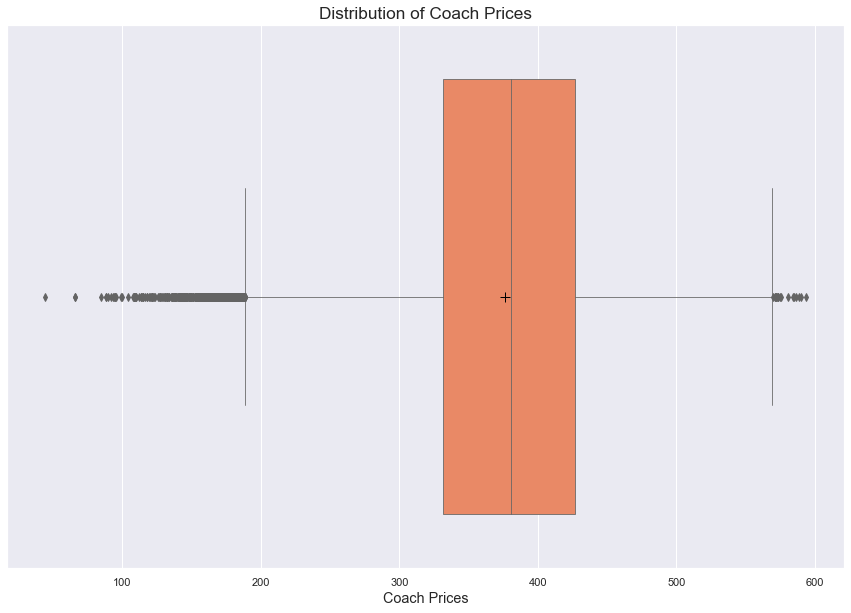

In [88]:
# Draw boxplot of all flights
visualise_boxplot(flights, column_name='coach_price', color='Coral', xlabel='Coach Prices', feature='Coach Prices')

Result: 
- High values are `500-600$`;
- Low: `100-200$`;
- Average: `380-390$`;
- $500 seems like a high price for a coach ticket, at least considering all available flights.

Now we'll think about where $500 falls for flights that are 8 hours long: Is it close to the mean or median (in the center of the histogram or box plot)? Or is it far away (in the tail of the histogram or box plot)? What are the high, low, and average prices for 8-hour-long flights?

Let's filter the dataset to get a slice with flights that take `8` or more hours. 

In [53]:
# Apply filter to hours to get long flights
more_than8h = flights[flights.hours >= 8]

Let's check how prices will look on a histplot. 

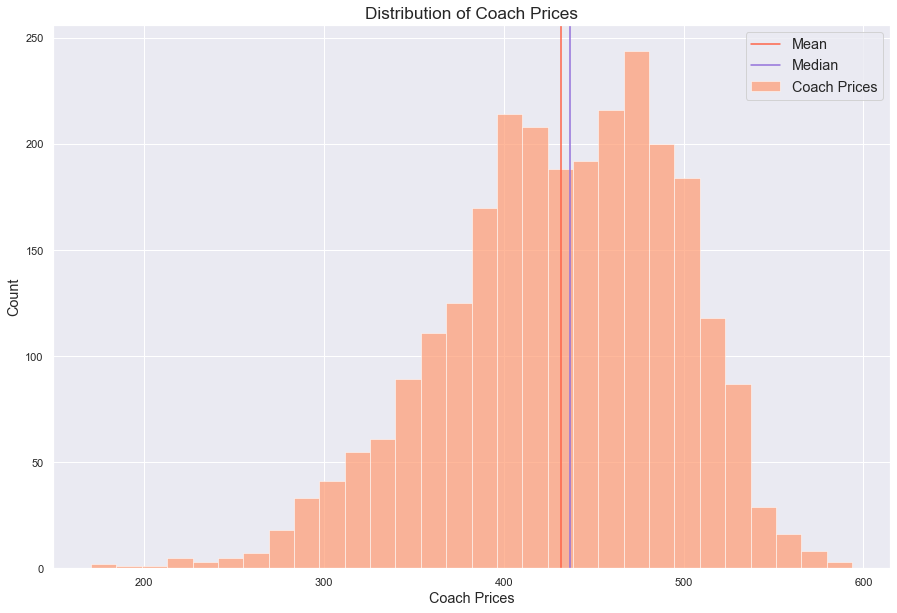

In [54]:
# Draw histogram of long flights
visualise_histplot(dataset=more_than8h, column_name='coach_price', bars_color='LightSalmon', xlabel='Coach Prices',feature='Coach Prices')

We can also check some statistics for the `coach_price` column. 

In [55]:
more_than8h.coach_price.describe()

count    2634.000000
mean      431.834377
std        64.083280
min       170.770000
25%       390.266250
50%       437.115000
75%       480.043750
max       593.635000
Name: coach_price, dtype: float64

Result: 
- We can see that histogram has 2 noticable peaks divided by a light downfall. First one is around `400$`, second, a major one, is around `470$`. 
- `500$` is closer to an average price for large distance flights. 
- Min is `170$`, max is `592$`.
- Mean and median are around `430-440$`.

Now let's find how are flight delay times distributed. Let’s say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. We want to better understand how often there are large delays so we can correctly set up connecting flights. What kinds of delays are typical?

Let's check delays statistics in general first, there is a chance that plots would end up very skewed because delays are not a common practice for modern airlines and tend to be avoided.

In [56]:
flights.delay.describe()

count    129780.000000
mean         13.162845
std          41.941680
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max        1560.000000
Name: delay, dtype: float64

From statistics we can see that most of delays are around 10 minutes. Let's check distribution of other values on a histogram, but we are going to separate fligts in 2 groups: 
- with delay time more than 1000 minutes;
- less than 1000 minutes. 

In [57]:
# Filter flights with delay more than 1000
more_than1000=flights[flights.delay > 1000]

# Filter flights with delay less than 1000
less_than1000=flights[flights.delay < 1000]

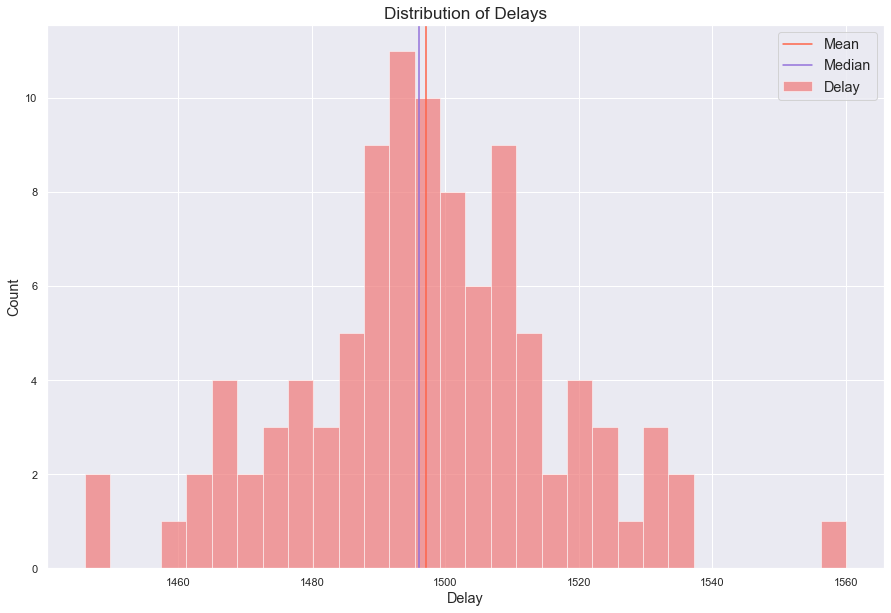

In [58]:
# Draw histogram with delay more than 1000
visualise_histplot(dataset=more_than1000, column_name='delay', bars_color='LightCoral', xlabel='Delay', feature='Delays')

In [59]:
# Get time statistics for slice with delay more than 1000
more_than1000.delay.describe()

count     100.000000
mean     1497.110000
std        19.664301
min      1446.000000
25%      1487.000000
50%      1496.000000
75%      1509.000000
max      1560.000000
Name: delay, dtype: float64

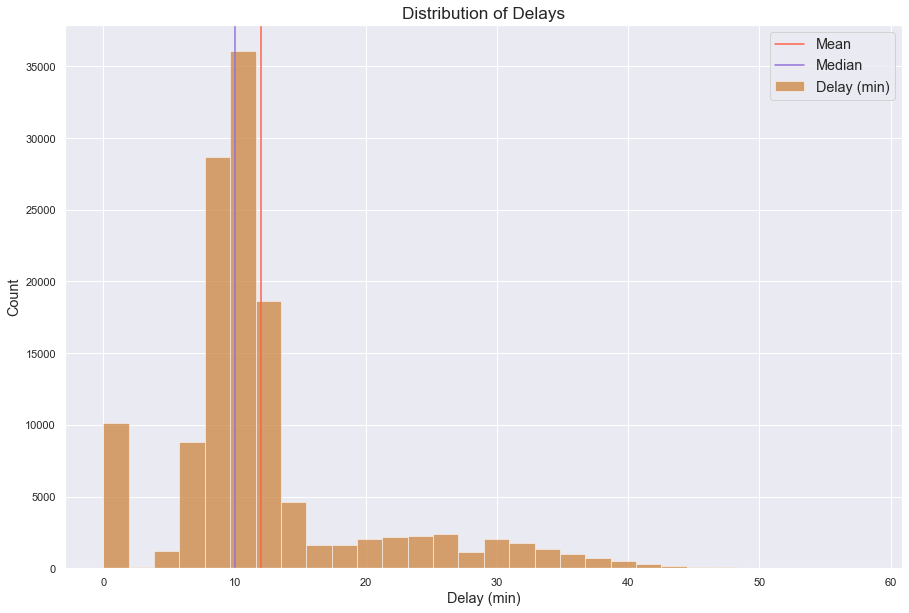

In [60]:
# Draw histogram with delay less than 1000
visualise_histplot(dataset=less_than1000, column_name='delay', bars_color='Peru', xlabel='Delay (min)', feature='Delays')

In [61]:
# Get time statistics for slice with delay less than 1000
less_than1000.delay.describe()

count    129680.000000
mean         12.018530
std           7.793645
min           0.000000
25%           9.000000
50%          10.000000
75%          13.000000
max          58.000000
Name: delay, dtype: float64

Result: 
- There are only `100` flights with the delay `more than 1000 min`. 
    - Thier mean is `1497 min`. 
    - Min is `1446 min`. 
    - Max is not far from min - `1560 min`. 
    - Standart deviation is `19 min`.
    - 75% of the flights from this slice have `1509 min.` delay.

--

- And `129 680` flights with delays `less than 1000 min`. 
    - Thier mean is `12 min`. 
    - Max is `58 min`. 
    - Standart deviation is about `8 min`.
    - 75% of the flights from this slice have only `13 min.` delay.



## Bivariate Analysis

Let's create a visualization that shows a relationship between coach and first-class prices, to understand whether flights with higher coach prices always have higher first-class prices as well.

If we make a scatterplot between `coach_price` and `firstclass_price`, we will see that there are too many data points which makes it difficult to see the nuanced relationship between these two features. To mitigate it we will change the opacity of the points to see if the mass of data points is extra packed in a certain area. Taking a random sample from the data set to see what a less busy version of this plot may look like will also be helpful. But our best remedy will be adding a LOWESS smoother through the plot - that will show the changes on the regression line directly. 

In [62]:
def visualise_lmplot(dataset, column_names, reg_line_color, title, xlabel, ylabel, hue_value=None, palette = None):
    sns.set_theme(color_codes=True)
    
    # Create lmplot
    ax =sns.lmplot(
        x = column_names[0], 
        y = column_names[1], 
        data=dataset.sample(n=7000),
        line_kws={'color': reg_line_color},
        palette=palette, 
        scatter_kws={ 's':50,'alpha':0.4},
        height=10,
        hue=hue_value,
        lowess=True)
    
    # Add descriptions
    plt.title(title, fontsize = 'x-large')
    plt.xlabel(xlabel, fontsize = 'large')
    plt.ylabel(ylabel, fontsize = 'large')

    return plt.show()

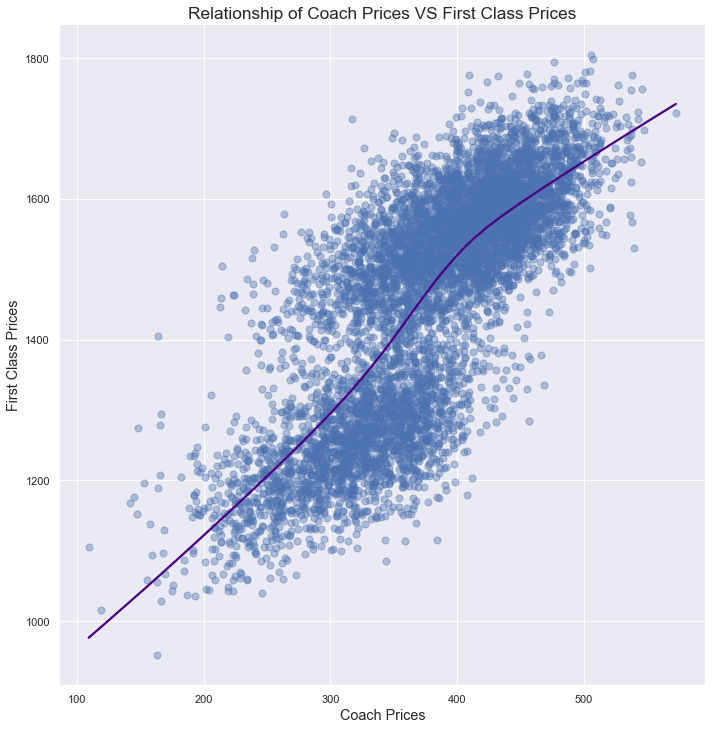

In [63]:
# Draw lmplot for Coach VS First Class Prices relationship
visualise_lmplot(
    flights, 
    column_names =['coach_price', 'firstclass_price'], 
    reg_line_color='Indigo',
    title='Relationship of Coach Prices VS First Class Prices', 
    xlabel='Coach Prices', 
    ylabel='First Class Prices')

Result: positive linear relationship is clearly visible, so one can say that indeed flights with higher coach prices always have higher first-class prices as well. 

What is the relationship between `coach_price` and inflight features like — `inflight_meal`, `inflight_entertainment`, and `inflight_wifi`? Which features are associated with the highest increase in price?

Let's create an overlapping histogram function to find out what we need. 

In [64]:
def visualise_histplotoverlap(dataset, column_names, palette, title, xlabel, ylabel, legend_title, legend_labels):
    # Prepare grid
    plt.figure(figsize = (15,10))

    # Plot a histogram
    ax = sns.histplot(
        dataset, 
        x=dataset[column_names[0]], 
        hue=dataset[column_names[1]], 
        stat="count", 
        alpha=0.8,
        legend=True, 
        palette= palette,
        bins=30)

    # Add descriptions
    ax.legend(title=legend_title, 
    title_fontsize='large', 
    loc='best', 
    labels=legend_labels, 
    fontsize = 'large')

    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

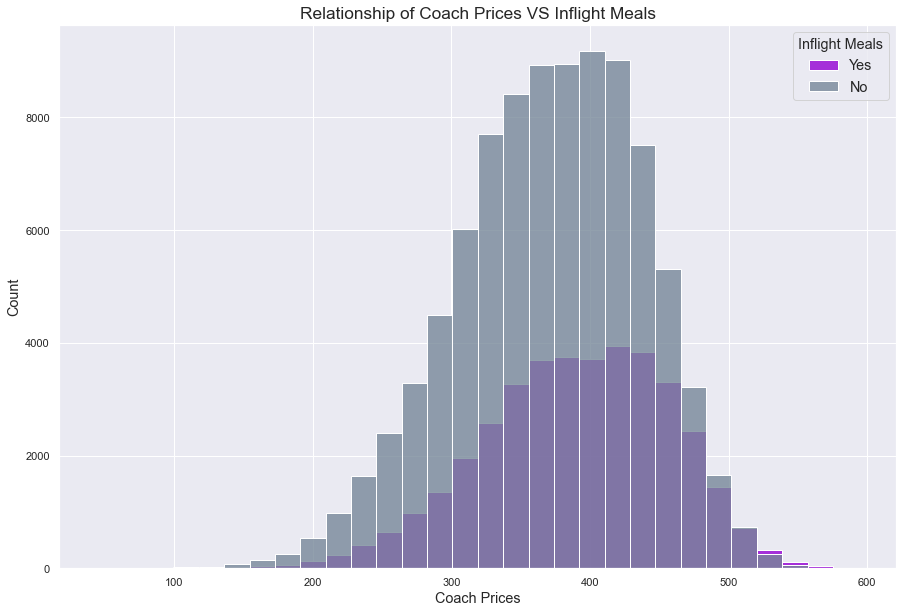

In [65]:
# Draw overlapping histplot for inflight_meal
visualise_histplotoverlap(
    flights, 
    column_names=['coach_price', 'inflight_meal'], 
    palette=['LightSlateGrey', 'DarkViolet'], 
    title='Relationship of Coach Prices VS Inflight Meals', 
    xlabel='Coach Prices', 
    ylabel='Count', 
    legend_labels=['Yes', 'No'], 
    legend_title='Inflight Meals')


In [66]:
# Get price statistics for slice with meals
with_meals = flights[flights.inflight_meal == 1]
with_meals.coach_price.describe()

count    38967.000000
mean       390.099807
std         67.267575
min         88.465000
25%        344.945000
50%        394.055000
75%        440.445000
max        593.635000
Name: coach_price, dtype: float64

In [67]:
# Find percentage of flights with meals from total
with_meals.shape[0] / flights.shape[0] * 100

30.025427646786866

In [68]:
# Get price statistics for slice with no meals
no_meals = flights[flights.inflight_meal == 0]
no_meals.coach_price.describe()

count    90813.000000
mean       370.786286
std         67.118950
min         44.415000
25%        326.085000
50%        374.895000
75%        420.645000
max        575.445000
Name: coach_price, dtype: float64

We can additionaly check the same data on a boxplot to get a bit different perspective. 

In [69]:
def visualise_boxplot(dataset, feature, palette, title, xlabel, ylabel):
    plt.figure(figsize = (15,10))
    ax = sns.boxplot(
        x= dataset[feature], 
        y= dataset.coach_price,
        palette=palette, 
        showmeans=True,
        meanprops={"marker": "+",
            "markeredgecolor": "black",
            "markersize": "10"},
        linewidth=0.5)

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')
    ax.set_xticklabels(['No', 'Yes'])

    return plt.show()

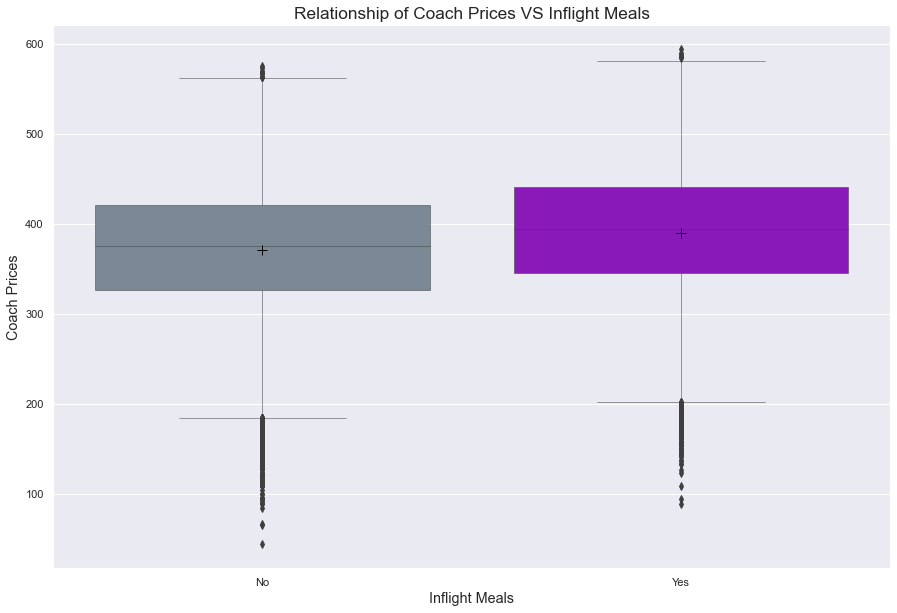

In [70]:
# Draw boxplot for inflight_meal
visualise_boxplot(
    flights, 
    feature='inflight_meal', 
    palette=['LightSlateGrey', 'DarkViolet'], 
    title='Relationship of Coach Prices VS Inflight Meals', 
    xlabel='Inflight Meals', 
    ylabel='Coach Prices')

Result for Inflight Meals:
- There are significantly more flights with no meals - about `70%`.
- Coach prices for flights with meals on average are `20$` higher, with `370$` for flights with no meals and `390$` for flights with them.
- Min and max have more visible price range between these 2 groups:
    - Minimum values for groups with and without meals respectively: `88$`, `44$`;
    - Maximum values for groups with and without meals respectively: `593$`, `575$`;

Let's do the same procedures for the `inflight_entertainment` feature.

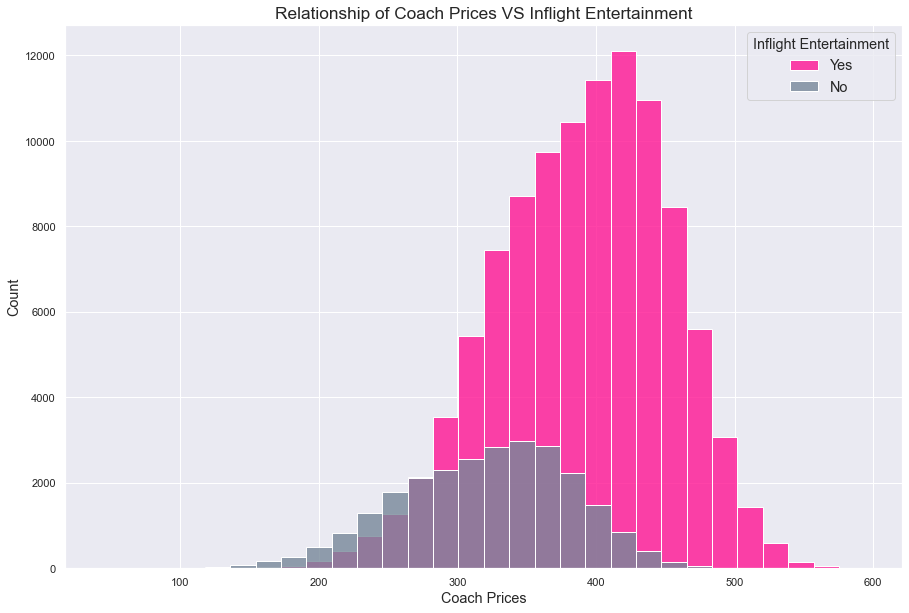

In [71]:
# Draw histplot for inflight_entertainment
visualise_histplotoverlap(
    flights, 
    column_names=['coach_price', 'inflight_entertainment'], 
    palette=['LightSlateGrey', 'DeepPink'], 
    title='Relationship of Coach Prices VS Inflight Entertainment', 
    xlabel='Coach Prices', 
    ylabel='Count', 
    legend_labels=['Yes', 'No'], 
    legend_title='Inflight Entertainment')

In [72]:
# Get price statistics for slice with entertainment
with_entertainment = flights[flights.inflight_entertainment == 1]
with_entertainment.coach_price.describe()

count    104028.000000
mean        390.488149
std          61.802031
min         109.245000
25%         347.460000
50%         395.140000
75%         435.720000
max         593.635000
Name: coach_price, dtype: float64

In [73]:
# Find percentage of flights with entertainment from total
with_entertainment.shape[0] / flights.shape[0] * 100

80.15718908922793

In [74]:
# Get price statistics for slice with no entertainment
no_entertainment = flights[flights.inflight_entertainment == 0]
no_entertainment.coach_price.describe()

count    25752.000000
mean       320.422995
std         61.351928
min         44.415000
25%        277.595000
50%        325.420000
75%        365.490000
max        519.410000
Name: coach_price, dtype: float64

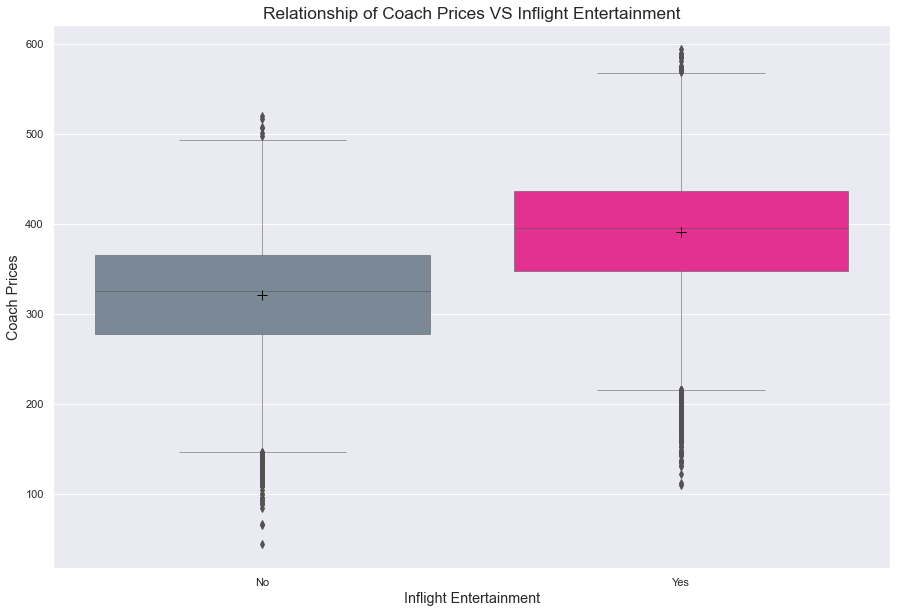

In [75]:
# Draw boxplot for inflight_entertainment
visualise_boxplot(
    flights, 
    feature='inflight_entertainment', 
    palette=['LightSlateGrey', 'DeepPink'], 
    title='Relationship of Coach Prices VS Inflight Entertainment', 
    xlabel='Inflight Entertainment', 
    ylabel='Coach Prices')

Result for Inflight Entertainment:
- The number of flights with some entertainment is higher - about `80%`.
- Coach prices for flights with entertainment on average are significantly higher - `~70$`, with `320$` for flights with no entertainment and `390$` for flights with them.
- Price ranges between groups with entertainment and without are respectively:
    - `109$` and `44$` for minimum;
    - `593$` and `519$` for maximum;

Now same for the `inflight_wifi` feature.

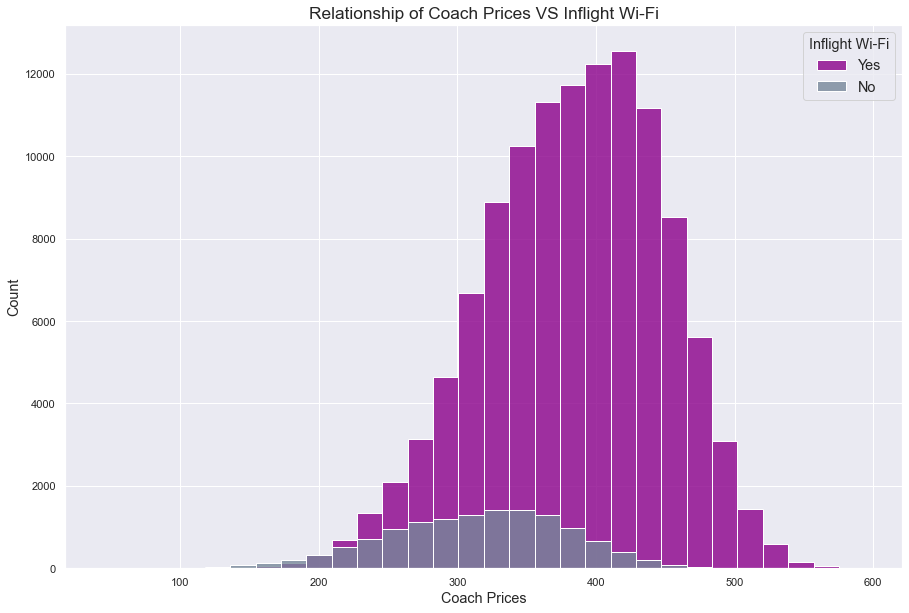

In [76]:
# Draw histplot for inflight_wifi
visualise_histplotoverlap(
    flights, 
    column_names=['coach_price', 'inflight_wifi'], 
    palette=['LightSlateGrey', 'DarkMagenta'], 
    title='Relationship of Coach Prices VS Inflight Wi-Fi', 
    xlabel='Coach Prices', 
    ylabel='Count', 
    legend_labels=['Yes', 'No'], 
    legend_title='Inflight Wi-Fi')

In [77]:
# Get price statistics for slice with wi-fi
with_wifi = flights[flights.inflight_wifi == 1]
with_wifi.coach_price.describe()

count    116766.000000
mean        383.651375
std          64.359080
min          93.425000
25%         339.475000
50%         387.620000
75%         431.028750
max         593.635000
Name: coach_price, dtype: float64

In [78]:
# Find percentage of flights with wi-fi from total
with_wifi.shape[0] / flights.shape[0] * 100

89.97226074895977

In [79]:
# Get price statistics for slice with no wi-fi
no_wifi = flights[flights.inflight_wifi == 0]
no_wifi.coach_price.describe()

count    13014.000000
mean       313.185626
std         64.299742
min         44.415000
25%        268.531250
50%        317.987500
75%        360.160000
max        487.390000
Name: coach_price, dtype: float64

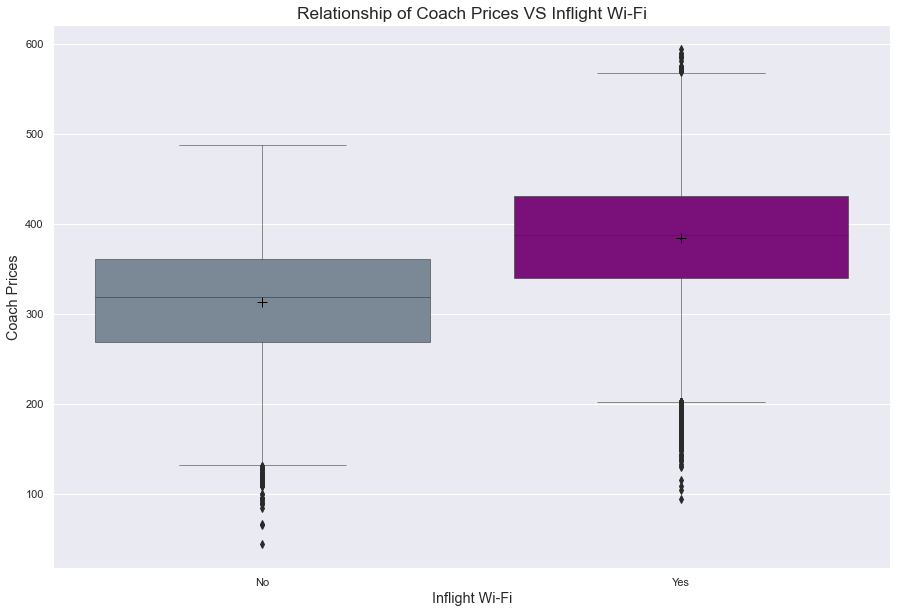

In [80]:
# Draw boxplot for inflight_wifi
visualise_boxplot(
    flights, 
    feature='inflight_wifi', 
    palette=['LightSlateGrey', 'DarkMagenta'], 
    title='Relationship of Coach Prices VS Inflight Wi-Fi', 
    xlabel='Inflight Wi-Fi', 
    ylabel='Coach Prices')

Result for Inflight Wi-Fi:
- The number of flights with Wi-Fi is also higher - about `90%` have Wi-Fi.
- Coach prices for flights with Wi-Fi on average are also significantly higher - for the same `70$`. With `313$` for flights with no Wi-Fi and `383$` for flights with them.
- Price ranges between groups with Wi-Fi and without are respectively:
    - `93$` and `44$` for minimum;
    - `593$` and `487$` for maximum;

What if flights have both Wi-Fi and entertaiment, what is the average price difference of these flights compared to others? 

In [81]:
flights[(flights.inflight_entertainment == 1)& (flights.inflight_wifi == 1)].coach_price.mean() - flights[(flights.inflight_entertainment == 0)& (flights.inflight_wifi == 0)].coach_price.mean()

140.09988688701884

Result: both entartaiment and Wi-Fi add `70$` each to the ticket price. 

The next question we are going to answer is how does the number of passengers change in relation to the length of flights?

In [82]:
def visualise_stripplot(dataset, column_names, title, xlabel, ylabel, hue_value=None, hue_order=None):
    plt.figure(figsize=(15, 10))
    ax = sns.stripplot(
        data=dataset, 
        x=column_names[0], 
        y=column_names[1], 
        alpha=.9, 
        linewidth=.05, 
        palette='flare', 
        hue_order=hue_order, 
        hue=hue_value)

    
    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

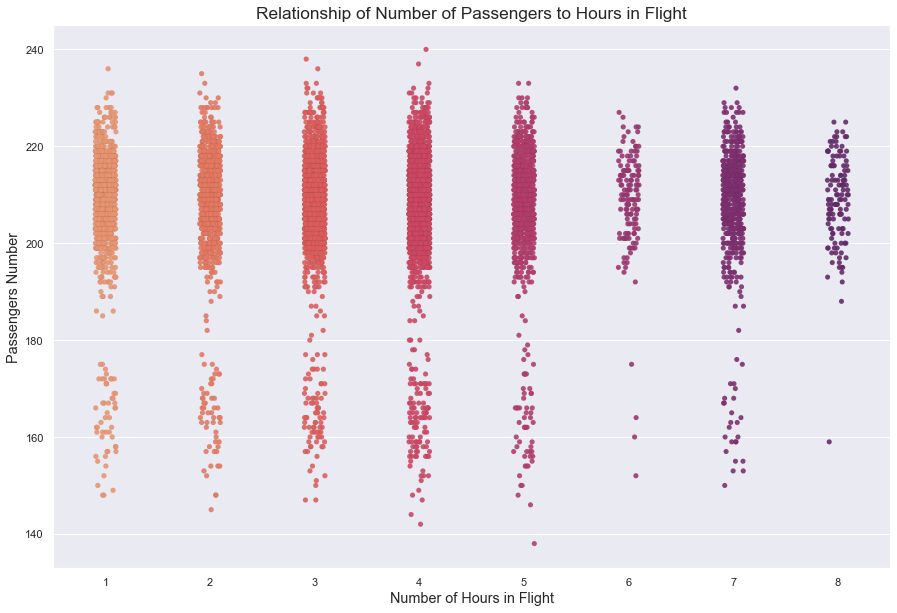

In [83]:
# Draw stripplot for Passengers to Hours relationship
visualise_stripplot(
     dataset=flights.sample(n=7000), 
     column_names=['hours', 'passengers'], 
     title='Relationship of Number of Passengers to Hours in Flight', 
     xlabel='Number of Hours in Flight', 
     ylabel='Passengers Number')

Result: 
- There are significantly fewer data points at 6 and 8 hours compared to the other hours. 
- There is a break in the distribution of passengers around 180 (very few flights have around 180 passengers). 


## Multivariate Analysis

Now let's explore relationship of several features to each other. We'll start with sisualisation of the relationship between coach and first-class prices on weekends compared to weekdays.


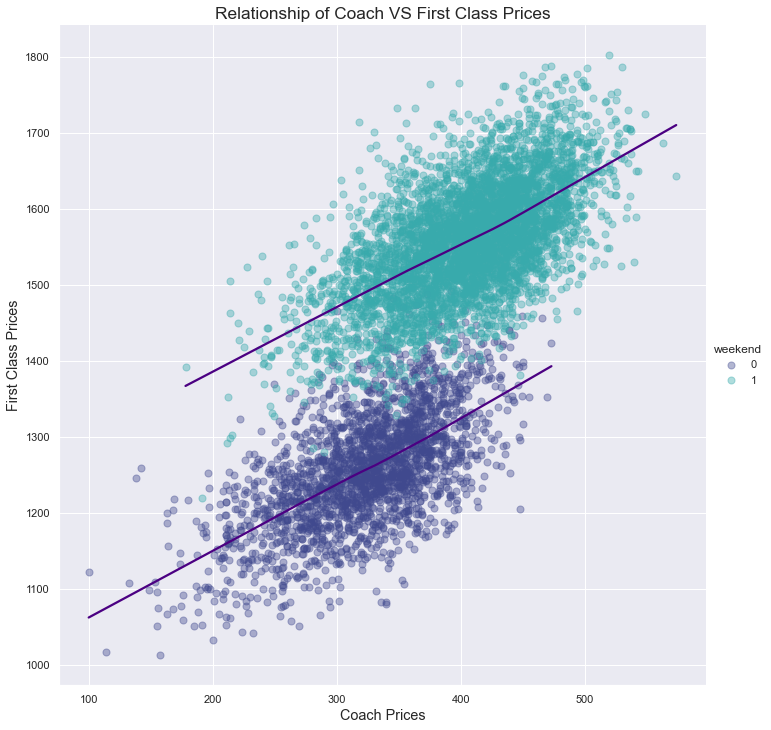

In [84]:
# Draw lmplot of Coach VS First Class Price relationship
visualise_lmplot(
    flights, 
    column_names =['coach_price', 'firstclass_price'], 
    hue_value='weekend',
    palette='mako',
    reg_line_color='Indigo',
    title='Relationship of Coach VS First Class Prices', 
    xlabel='Coach Prices', 
    ylabel='First Class Prices')

Result:
- On average, weekend tickets are more expensive than weekday tickets. 
- The price difference between first-class and coach level tickets is larger on the weekend than on a weekday.

How do coach prices differ for redeyes and non-redeyes on each day of the week?

In [85]:
def visualise_boxplot(dataset, column_names, palette, title, xlabel, ylabel):
    plt.figure(figsize = (15,10))
    ax = sns.boxplot(
        data=dataset,
        x= column_names[0], 
        y= column_names[1],
        hue=column_names[2],
        hue_order=[1,0],
        palette=palette, 
        showmeans=True,
        meanprops={"marker": "+",
            "markeredgecolor": "black",
            "markersize": "10"},
        linewidth=0.5)

    # Add descriptions
    ax.set_title(title, fontsize = 'x-large')
    ax.set_xlabel(xlabel, fontsize = 'large')
    ax.set_ylabel(ylabel, fontsize = 'large')

    return plt.show()

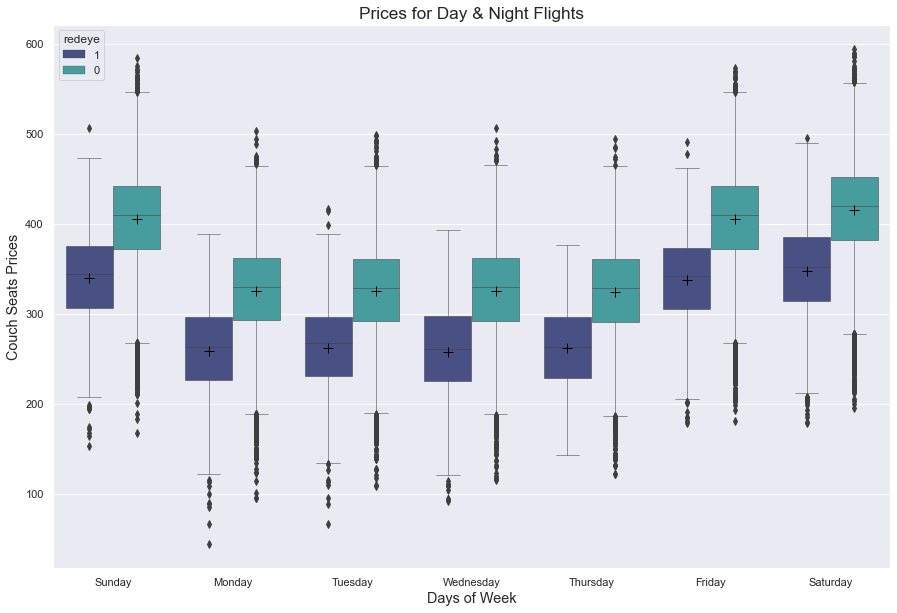

In [86]:
# Draw boxplot of Prices for Day & Night Flights
visualise_boxplot(
    flights, 
    column_names=['day_of_week', 'coach_price', 'redeye'], 
    palette='mako', 
    title='Prices for Day & Night Flights', 
    xlabel='Days of Week', 
    ylabel='Couch Seats Prices', 
)

Result: We can see more clearly that the difference between night (`redeye` - `1`) and day flights is pretty much the same on any day of the week, though on average weekend flights cost more than weekday flights.


## Conclusion

We have applied univariate, bivariate and multivariate analysis and visualised our results. In general, we have found out that:
- Average couch seat prices for all flights are around `390$`, but for flights that take `8 hours` - the average is about `440$`.
- Average flight delay time is `10 minutes`. 
- Flights without meals are on average `20$` cheaper.
- Flights with entertainment and Wi-Fi tend to be about `140$` more expensive (each option costs `70$` more).
- Most of the flights have more than `180` passengers.
- Long hour flights, specifically `6 and 8 hours`, are less popular than others.
- The higher couch seat prices are the higher those of the first class. But first-class tickets are more profitable to buy on weekdays. 
- Night flights, in general, are cheaper, especially on weekdays.